# ANN

# 1. PREPROCESSING DATA

#LOAD LIBRARIES

In [10]:
# Load libraries
import os
import numpy as np
import cv2
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load Dataset  

In [2]:
dir = '../dataset'
dir_train = f'{dir}/train'
dir_valid = f'{dir}/validation'

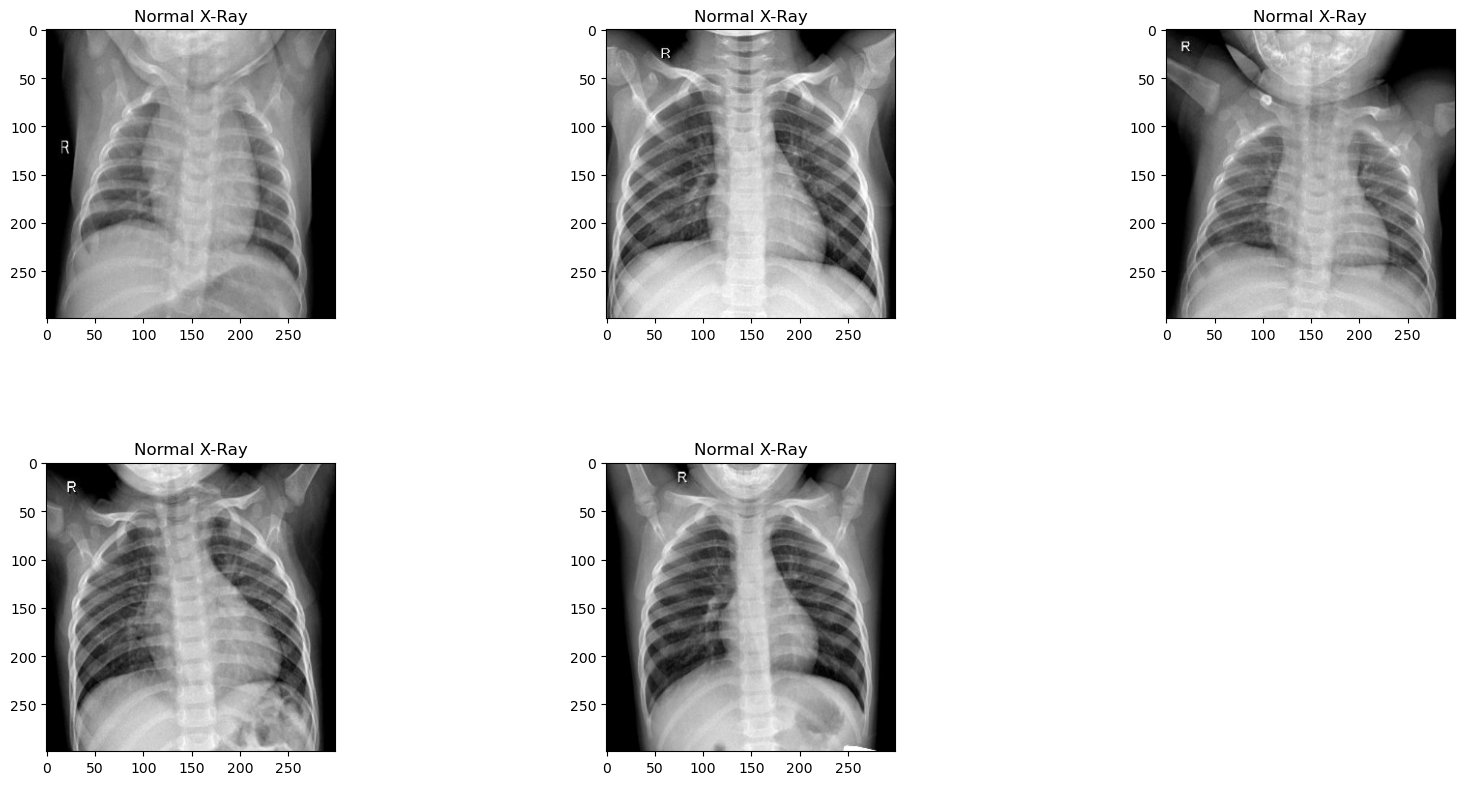

In [13]:
plt.figure(figsize=(20 , 15))
for i in np.arange(1,6):
    plt.subplot(3, 3, i)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    # Normal
    dir_img = f'{dir_train}/0_Normal/Normal ({i}).jpg'
    img = cv2.imread(dir_img)
    plt.imshow(img) 
    plt.title('Normal X-Ray')

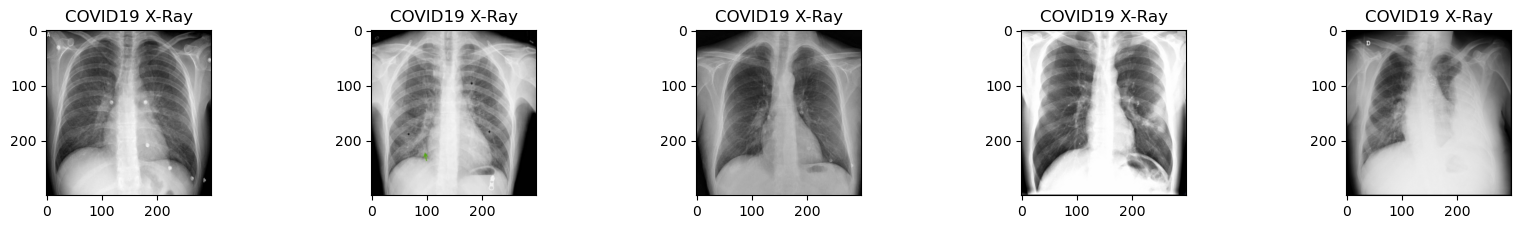

In [4]:
plt.figure(figsize=(20 , 15))
for i in np.arange(1,6):
    plt.subplot(5, 5, i)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    # COVID-19
    dir_img = f'{dir_train}/1_Covid19/COVID-19 ({i}).jpg'
    img = cv2.imread(dir_img)
    plt.imshow(img) 
    plt.title('COVID19 X-Ray')

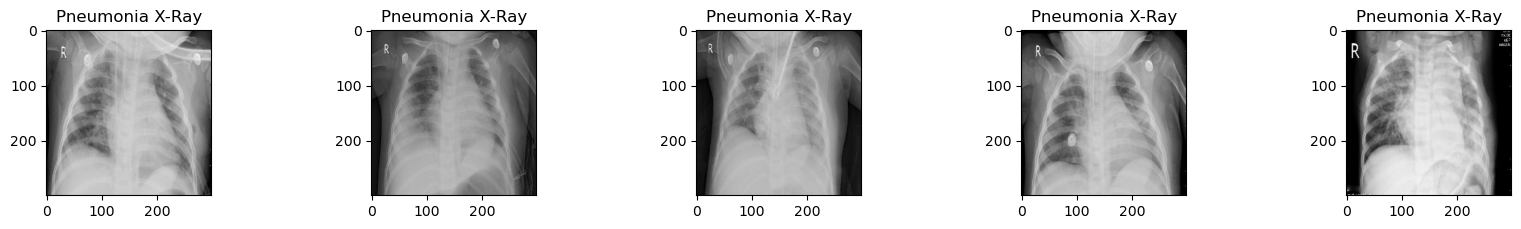

In [5]:
plt.figure(figsize=(20 , 15))
for i in np.arange(1,6):
    plt.subplot(5, 5, i)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    # Pneumonia-Bacterial
    dir_img = f'{dir_train}/2_Pneumonia/Pneumonia-Bacterial ({i}).jpg'
    img = cv2.imread(dir_img)
    plt.imshow(img) 
    plt.title('Pneumonia X-Ray')

# ADJUST DIMENSION

In [ ]:
# Resizing
IMAGE_SIZE = (128, 128)

# Data augmentation & scaling

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    rotation_range=15,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Training

In [8]:
# Load 
train_generator = train_datagen.flow_from_directory(
    dir_train,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    dir_valid,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical'
)

Found 7367 images belonging to 3 classes.
Found 1841 images belonging to 3 classes.


# DEFINE MODEL

In [19]:
model = Sequential([
    Input(shape=(128, 128, 3)),
    Rescaling(1./255),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 kelas output
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │    50,332,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,989,571 (194.51 MB)

 Trainable params: 50,989,571 (194.51 MB)

 Non-trainable params: 0 (0.00 B)

# OPTIMIZE TRAINING

In [12]:
# Training
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[]
)

Epoch 1/15


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


461/461 ━━━━━━━━━━━━━━━━━━━━ 521s 1s/step - accuracy: 0.5038 - loss: 0.9408 - val_accuracy: 0.7664 - val_loss: 0.6429
Epoch 2/15
461/461 ━━━━━━━━━━━━━━━━━━━━ 492s 1s/step - accuracy: 0.7192 - loss: 0.6370 - val_accuracy: 0.7556 - val_loss: 0.5326
Epoch 3/15
461/461 ━━━━━━━━━━━━━━━━━━━━ 450s 972ms/step - accuracy: 0.7979 - loss: 0.4998 - val_accuracy: 0.7110 - val_loss: 0.6387
Epoch 4/15
461/461 ━━━━━━━━━━━━━━━━━━━━ 465s 1s/step - accuracy: 0.8074 - loss: 0.4609 - val_accuracy: 0.7898 - val_loss: 0.4678
Epoch 5/15
461/461 ━━━━━━━━━━━━━━━━━━━━ 484s 1s/step - accuracy: 0.8236 - loss: 0.4372 - val_accuracy: 0.8398 - val_loss: 0.3909
Epoch 6/15
461/461 ━━━━━━━━━━━━━━━━━━━━ 586s 1s/step - accuracy: 0.8273 - loss: 0.4147 - val_accuracy: 0.8213 - val_loss: 0.4136
Epoch 7/15
461/461 ━━━━━━━━━━━━━━━━━━━━ 531s 1s/step - accuracy: 0.8362 - loss: 0.4021 - val_accuracy: 0.7795 - val_loss: 0.5018
Epoch 8/15
461/461 ━━━━━━━━━━━━━━━━━━━━ 508s 1s/step - accuracy: 0.8468 - loss: 0.3931 - val_accuracy: 0.

# PLOT

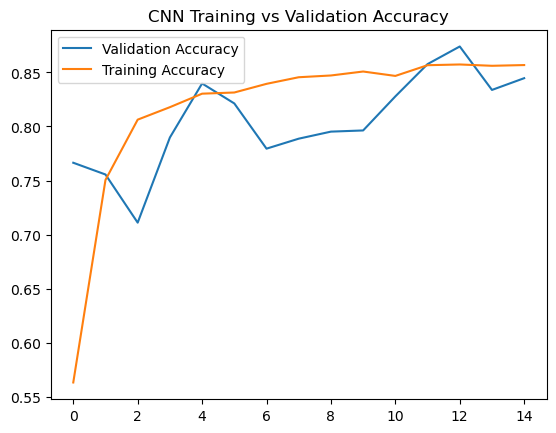

In [14]:
# Plot Training & Validation Accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.legend()
plt.title('CNN Training vs Validation Accuracy')
plt.show()

In [15]:
y_true = []
y_pred = []

# Hitung total batch yang dibutuhkan
steps = len(val_generator)

for i in range(steps):
    images, labels = next(val_generator)  # ambil 1 batch
    preds = model.predict(images)

    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/st

              precision    recall  f1-score   support

      Normal       0.74      0.93      0.82       654
     Covid19       0.94      0.87      0.90       256
   Pneumonia       0.93      0.78      0.85       931

    accuracy                           0.84      1841
   macro avg       0.87      0.86      0.86      1841
weighted avg       0.86      0.84      0.85      1841



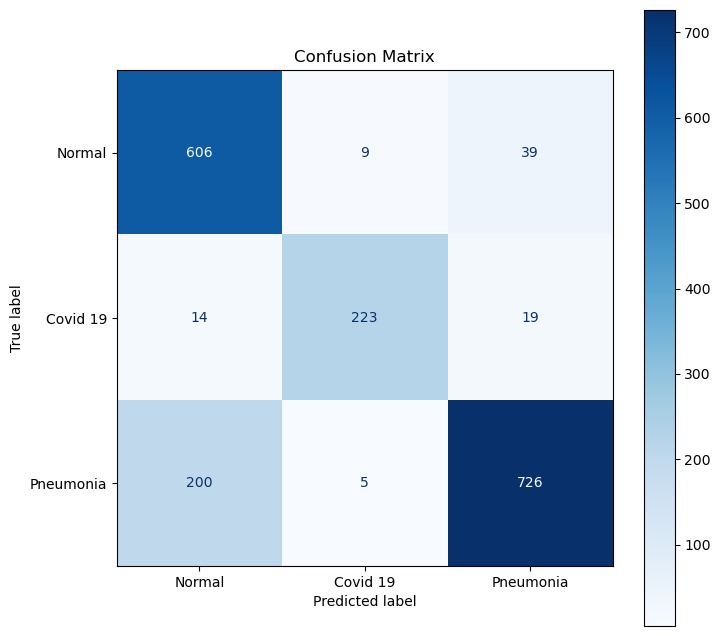

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

# Daftar nama kelas
class_names = ['Normal', 'Covid 19', 'Pneumonia']  # sesuaikan dengan dataset kamu

# Hitung confusion matrix
cm = confusion_matrix(y_true, y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=['Normal', 'Covid19', 'Pneumonia']))

# Visualisasi confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=True)
plt.title('Confusion Matrix')
plt.show()

# Predict New Data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


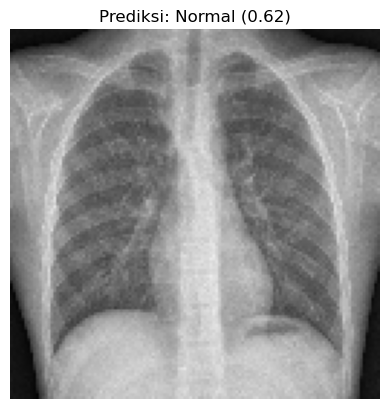

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


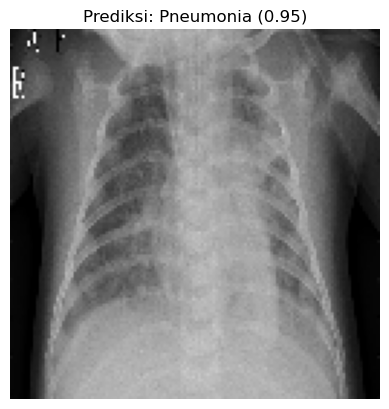

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


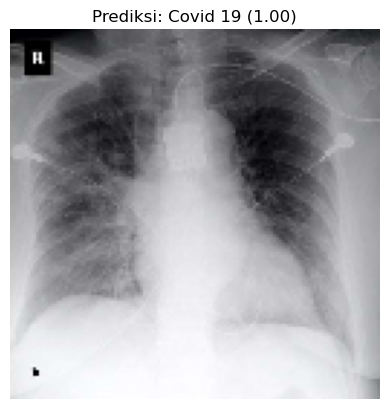

In [17]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Daftar kelas (urutan sama seperti pada training)
class_names = ['Normal', 'Covid 19', 'Pneumonia']

def predict_custom_image(image_path):
    # Load dan ubah ukuran gambar sesuai input model
    img = load_img(image_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0  # Normalisasi
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan batch dimension

    # Prediksi
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = class_names[predicted_class_index]
    confidence = prediction[0][predicted_class_index]

    # Tampilkan hasil
    plt.imshow(img)
    plt.title(f"Prediksi: {predicted_class_name} ({confidence:.2f})")
    plt.axis('off')
    plt.show()

predict_custom_image("../dataset/normal.jpeg")
predict_custom_image("../dataset/pneumoni.jpeg")
predict_custom_image("../dataset/covid.jpeg")

In [1]:
# Load libraries
import os
import numpy as np
import cv2
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Set direktori
dir = '../dataset'
dir_train = f'{dir}/train'
dir_valid = f'{dir}/validation'

# Preprocessing data
IMAGE_SIZE = (128, 128)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    rotation_range=15,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    dir_train,
    target_size=IMAGE_SIZE,
    batch_size=16,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    dir_valid,
    target_size=IMAGE_SIZE,
    batch_size=16,
    class_mode='categorical'
)

# ANN Model
model = Sequential([
    Input(shape=(128, 128, 3)),
    Flatten(),  # Ubah gambar ke 1D
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 kelas output
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[]
)

# Plot Akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('ANN Training vs Validation Accuracy')
plt.show()

# Prediksi & Evaluasi
y_true = []
y_pred = []
steps = len(val_generator)

for i in range(steps):
    images, labels = next(val_generator)
    preds = model.predict(images)
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

# Confusion Matrix
class_names = ['Normal', 'Covid 19', 'Pneumonia']

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=True)
plt.title('Confusion Matrix')
plt.show()

# Laporan klasifikasi
print(classification_report(y_true, y_pred, target_names=class_names))

# Fungsi prediksi gambar custom
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_custom_image(image_path):
    img = load_img(image_path, target_size=IMAGE_SIZE)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = class_names[predicted_class_index]
    confidence = prediction[0][predicted_class_index]
    
    plt.imshow(img)
    plt.title(f"Prediksi: {predicted_class_name} ({confidence:.2f})")
    plt.axis('off')
    plt.show()

predict_custom_image("../dataset/normal.jpeg")


Found 7367 images belonging to 3 classes.
Found 1841 images belonging to 3 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    25,166,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,330,947 (96.63 MB)

 Trainable params: 25,330,947 (96.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


205/461 ━━━━━━━━━━━━━━━━━━━━ 4:49 1s/step - accuracy: 0.4337 - loss: 8.9874

KeyboardInterrupt: 